In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

In [90]:
def plot_situtation(dots_guesses, robot, doors):
    plt.scatter(dots_guesses[:, 0], np.zeros_like(dots_guesses[:, 0]))
    plt.vlines(x=doors, ymin=[-0.01]*doors.shape[0], ymax=[0.01]*doors.shape[0], colors='teal', ls='--', lw=2)
    plt.scatter(robot[0], 0, color='red', lw=5)
    plt.plot()

In [3]:
def get_mistake(robot, doors, dots_guesses):
    error_robots = doors - robot[0]
    robot_error = np.min(np.abs(error_robots[(np.sign(error_robots) == np.sign(robot[1])) | (np.sign(error_robots) == 0)]))



    error_dots = np.tile(doors, (dots_guesses.shape[0], 1)) - dots_guesses[:, 0].reshape((dots_guesses.shape[0], 1))
    mask_of_dirrections = (np.sign(error_dots) == np.sign(dots_guesses[:,1].reshape((dots_guesses.shape[0], 1))))
    mask_of_zeros = (np.sign(error_dots) == 0)
    mask = np.ma.mask_or(mask_of_dirrections, mask_of_zeros)
    dot, door_error_ind = mask.nonzero()
    i = 0
    # point_closest_arr = np.array()
    mistake=np.abs(mask*error_dots)
    mistake[mistake == 0] = np.max(mistake)*2
    dots_error = np.min(mistake,axis=1)

    return [robot_error, dots_error]


In [32]:
def get_probabilities(robot_error, dots_error):
    return scipy.stats.norm(robot_error, 0.05/2).pdf(dots_error)

In [28]:
def redraw_by_probibilities(particles, weights, n = 1000):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1. # avoid round-off error
    indexes = np.searchsorted(cumulative_sum, np.random.random(N))

    # resample according to indexes
    particles[:] = particles[indexes]
    weights.fill(1.0 / N)
    return particles

In [29]:
def make_step(robot):
    step = np.random.random(1)
    dir = np.random.random(1)
    if dir > 0.5:
        return [[robot[0] + robot[1] * step, robot[1]], step, 1]
    else:
        return [[robot[0] - robot[1] * step, -robot[1]], step, -1]

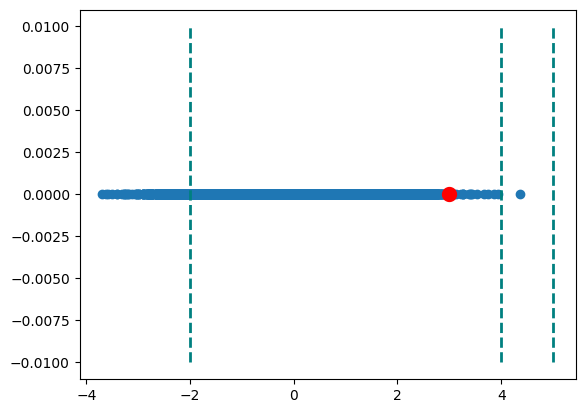

In [91]:
dots_guesses = np.random.standard_normal((21000,2))
dots_guesses[dots_guesses[:, 1] > 0, 1] = 1
dots_guesses[dots_guesses[:, 1] < 0, 1] = -1

robot = np.array([3, -1])

doors = np.array([ -2 , 4, 5])
plot_situtation(dots_guesses, robot, doors)

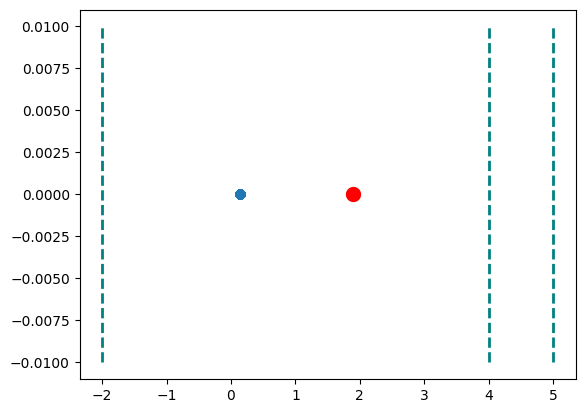

In [138]:
robot, step, dir = make_step(robot)
# print(dots_guesses)
dots_guesses[:,0] += dots_guesses[:,1] * dir * step
dots_guesses[:,1] = dots_guesses[:,1] * dir
# print(dots_guesses)
robot_error, dots_error = get_mistake(dots_guesses=dots_guesses, robot= robot, doors=doors)
probs = get_probabilities(robot_error, dots_error)
# print(probs)
dots_guesses = redraw_by_probibilities(dots_guesses, probs)
plot_situtation(dots_guesses, robot, doors)

In [42]:
print(dots_guesses[np.argmax(probs)])

[-0.7414414 -1.       ]
